In [3]:
import pandas as pd
import numpy as np

# Data preparation

In [4]:
df_raw = pd.read_csv('./Data_Processed_All_Contractors_Characteristics - Data2.csv')

# (1) Extract X and Y for model1: apply~register

In [19]:
df_RtoA_xy_winreg=df_raw.loc[df_raw['applied_in_window_12months_or_not']!='Not enough info',:'applied_in_window_12months_or_not'].drop(['Dealer ID','JS 17.Column3','JS 18.Column3','JS 19.Column3',\
                                                         'NON USER 17.Column3','NON USER 18.Column3','Velocity 17.Column3','centurty 18.Column3',\
                                                         'Gibson 18.Column3','No. of Employees', 'applied 2016','applied 2017', 'applied 2018',\
                                                                        'applied 2019','2016_summer','2016_winter','2016_other','2017_summer',\
                                                                       '2017_winter', '2017_other', '2018_summer', '2018_winter', '2018_other', '2019_summer',\
                                                                       '2019_winter', '2019_other','Recency'],axis=1)
df_RtoA_xy_winreg.columns

Index(['year', 'train_test', 'Converted State-AL', 'Converted State-AR',
       'Converted State-CA', 'Converted State-FL', 'Converted State-GA',
       'Converted State-IL', 'Converted State-IN', 'Converted State-KY',
       'Converted State-LA', 'Converted State-MI', 'Converted State-MO',
       'Converted State-NC', 'Converted State-NJ', 'Converted State-OH',
       'Converted State-Others', 'Converted State-PA', 'Converted State-SC',
       'Converted State-TN', 'Converted State-TX', 'employeebucket-NA',
       'employeebucket-4~8', 'employeebucket-<4', 'employeebucket->8',
       'Sales between 0-99,999', 'Sales between 100,000-499,999',
       'Other Sales', 'Sales N/A', 'Currently offers Consumer Financing?_No',
       'Currently offers Consumer Financing?_Yes',
       'Currently offers Consumer Financing?_N/A', 'Over 10', 'Below 10',
       'No year info', 'Hitting Potential 16.Column3', 'JS 16.Column3',
       'NON USER 16.Column3', 'brand_1', 'brand_2', 'brand_3', 'brand_4',


In [20]:
df_RtoA_xy_winreg.applied_in_window_12months_or_not.value_counts()

1    2344
0    1477
Name: applied_in_window_12months_or_not, dtype: int64

# (2) Drop NaN rows

In [21]:
print(df_RtoA_xy_winreg.isnull().any())

year                                        False
train_test                                  False
Converted State-AL                          False
Converted State-AR                          False
Converted State-CA                          False
Converted State-FL                          False
Converted State-GA                          False
Converted State-IL                          False
Converted State-IN                          False
Converted State-KY                          False
Converted State-LA                          False
Converted State-MI                          False
Converted State-MO                          False
Converted State-NC                          False
Converted State-NJ                          False
Converted State-OH                          False
Converted State-Others                      False
Converted State-PA                          False
Converted State-SC                          False
Converted State-TN                          False


In [6]:
# narow=[]
# for i in range(df_RtoA_xy_raw.shape[0]):
#     if df_RtoA_xy_raw["No. of Employees"].isnull()[i]== True:
#         narow.append(i)

# df_RtoA_xy=df_RtoA_xy_raw.drop(narow,axis=0)
# df_RtoA_xy["No. of Employees"].isnull().any()

# Devide into train and test data

In [22]:
df_RtoA_xy_winreg.train_test.value_counts()

1    3052
0     769
Name: train_test, dtype: int64

In [38]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

X_train=df_RtoA_xy_winreg.loc[df_RtoA_xy_winreg['train_test']==1,:'brand_8'].drop(['train_test'],axis=1)
X_test=df_RtoA_xy_winreg.loc[df_RtoA_xy_winreg['train_test']==0,:'brand_8'].drop(['train_test'],axis=1)
Y_train=df_RtoA_xy_winreg.loc[df_RtoA_xy_winreg['train_test']==1,'applied_in_window_12months_or_not'].apply(lambda x:int(x))
Y_test=df_RtoA_xy_winreg.loc[df_RtoA_xy_winreg['train_test']==0,'applied_in_window_12months_or_not'].apply(lambda x:int(x))

# Build logistic regression model (with cv)

In [24]:
import numpy as np
from sklearn.linear_model.logistic import LogisticRegressionCV #model building
from sklearn.preprocessing import StandardScaler #standardize xs
#from sklearn.model_selection import GridSearchCV #GridSearchCV: cross validation

In [11]:
# sc = StandardScaler()
# sc.fit(X_train)
# X_train = sc.transform(X_train)
# X_test = sc.transform(X_test)

In [39]:
logreg = LogisticRegressionCV(solver='liblinear')
logreg.fit(X_train, Y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

# Model Evaluation

     1. Confusion Matrix
     2 TP, FP, TN, FN
     3. Accuracy Rate
     4. PPV & NPV
     5. Sensitivity & Specificity
     6. F1 Score
     **********Summary***********
     7. Cumulative Gains Chart
     8. AUC-ROC Curve

# (1) Confusion Matrix

In [40]:
pred = logreg.predict(X_test)
pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [41]:
from sklearn.metrics import confusion_matrix 
matrix = confusion_matrix(Y_test, pred, labels=None, sample_weight=None)
tn, fp, fn, tp=matrix.ravel() #与下面计算tn, fp, fn, tp重复
df_confusion_matrix = pd.DataFrame([[tp,fp],[tn,fn]],columns=['pred_positive','pred_negative'],index=['real_positive','real_negative'])
df_confusion_matrix

,pred_positive,pred_negative
real_positive,461,253
real_negative,43,12


# (2) TP, FP, TN, FN


Positive, Negative: 预测结果

True, False: 预测是否正确

-> Method 1: 从confusion matrix获得（见上）

In [42]:
tn, fp, fn, tp=matrix.ravel()
(tn, fp, fn, tp)

(43, 253, 12, 461)

-> *Method 2: 直接算

In [43]:
df=pd.DataFrame(pred,Y_test)
df1=df.reset_index(inplace=False)
df1.rename(columns={"applied_in_window_12months_or_not":"Y_test",0:"predict"},inplace=True)
df1.head()

,Y_test,predict
0,0,1
1,1,1
2,1,1
3,0,1
4,0,1


In [45]:
df_tp=df1.loc[(df1['Y_test']==df1['predict']) & (df1['predict']==1),:]
tp=df_tp.shape[0]
tp

461

In [46]:
df_tn=df1.loc[(df1['Y_test']==df1['predict']) & (df1['predict']==0),:]
tn=df_tn.shape[0]
tn

43

In [47]:
df_fp=df1.loc[(df1['Y_test']!=df1['predict']) & (df1['predict']==1),:]
fp=df_fp.shape[0]
fp

253

In [48]:
df_fn=df1.loc[(df1['Y_test']!=df1['predict']) & (df1['predict']==0),:]
fn=df_fn.shape[0]
fn

12

In [49]:
(tn, fp, fn, tp)

(43, 253, 12, 461)

# (3) Accuracy Rate
$$ACC=\frac{TP+TN}{TP+TN+FP+FN}$$



-> Method 1: 直接算

In [50]:
acc=(tp+tn)/(tp+tn+fp+fn)
acc

0.6553966189856957

-> Method 2: 调包

In [51]:
from sklearn.metrics import accuracy_score 
accuracy_score(Y_test,pred)

0.6553966189856957

-> Method 3: 使用模型自带方法.score

In [52]:
acc = logreg.score(X_test,Y_test)
acc

0.6553966189856957

# (4) PPV & NPV

描述pred中的...

# -> PPV (Precision) :   
pred_positive 中 real_positive 

$$PPV=\frac{TP}{TP+FP}$$

-> Method 1: 直接算

In [53]:
ppv=tp/(tp+fp)
ppv

0.6456582633053222

-> Method 2: 调包

In [54]:
from sklearn.metrics import precision_score 
precision_score(Y_test,pred)

0.6456582633053222

# -> NPV: 
pred_negative 中 real_negative

$$NPV=\frac{TN}{TN+FN}$$

In [55]:
npv=tn/(tn+fn)
npv

0.7818181818181819

# (5) Sensitivity & Specificity

描述real中的...

# -> Sensitivity (Recall) (True Positive Rate - TPR) : 
real_positive 中 pred_positive

$$Sensitivity=\frac{TP}{TP+FN}$$

In [56]:
sen=tp/(tp+fn)
sen

0.9746300211416491

# -> Specificity (True Negative Rate - TNR) :
# = 1 - (False Positive Rate - FPR)
real_negative 中 pred_negative

$$Specificity=\frac{TN}{TN+FP}$$

In [57]:
spe=tn/(tn+fp)
spe

0.14527027027027026

# (6) F1 Score

$$F1=2*\frac{Precision*Recall}{Precision+Recall}$$

In [58]:
f1=2*ppv*sen/(ppv+sen)
f1

0.776748104465038

In [59]:

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report 

# Summary Table

In [60]:
df_confusion_matrix

,pred_positive,pred_negative
real_positive,461,253
real_negative,43,12


In [61]:
summary_tuple=(acc,ppv,npv,sen,spe,f1)
df_summary=pd.DataFrame(list(summary_tuple),columns=['Value'],index=['Accuracy','PPV (Precision)','NPV','Sensitivity (Recall) (TPR)','Specificity (TNR) (1-FPR)','F1'])

df_summary['Value_rounded']=df_summary.Value.apply(lambda x: round(x,2))
df_summary.drop('Value',axis=1,inplace=True)
df_summary

,Value_rounded
Accuracy,0.66
PPV (Precision),0.65
NPV,0.78
Sensitivity (Recall) (TPR),0.97
Specificity (TNR) (1-FPR),0.15
F1,0.78


# (7) Cumulative Gains Chart

In [65]:
#set up dataframe of pred vs actual
pred_prob = logreg.predict_proba(X_test)
df_pred_positive_prob=pd.DataFrame(pred_prob).drop(0,axis=1)
df_test_result=df_pred_positive_prob.rename(columns={1:'Predict_Positive_Prob'})
df_test_result['Predict']=pred
df_test_result['Actual']=Y_test.tolist()
df_test_result['Contractor_ID']=df_raw.loc[df_raw['applied_in_window_12months_or_not']!='Not enough info',:'Dealer ID']

#calculate true positive and its cumulative
df_test_result=df_test_result.sort_values(by=["Predict_Positive_Prob"],ascending=False).reset_index(drop=True)
df_test_result["True_Positive"]=df_test_result.apply(lambda x: ((x["Actual"]==x["Predict"]) & (x["Actual"]==1))*1,axis=1)
df_test_result["Cumulative_True_Positive"]=df_test_result["True_Positive"].cumsum() #numpy
total_true_positive=df_test_result["True_Positive"].sum()

#calculate % cumulative true positive counts vs % ID counts (linear)
df_test_result["%_Cumulative_True_Positive"]=df_test_result["Cumulative_True_Positive"]/total_true_positive
df_test_result["%_Cumulative_Count"]=df_test_result["Contractor_ID"].expanding().count()/df_test_result["Contractor_ID"].count() #.expanding(): pandas

df_test_result.head(10)

,Predict_Positive_Prob,Predict,Actual,Contractor_ID,True_Positive,Cumulative_True_Positive,%_Cumulative_True_Positive,%_Cumulative_Count
0,0.809199,1,1,C15513,1,1,0.002169,0.001300
1,0.806268,1,1,C15924,1,2,0.004338,0.002601
2,0.795040,1,0,C15824,0,2,0.004338,0.003901
3,0.789605,1,0,A03757,0,2,0.004338,0.005202
4,0.788828,1,1,C15699,1,3,0.006508,0.006502
5,0.788191,1,1,C16054,1,4,0.008677,0.007802
6,0.786098,1,1,C15332,1,5,0.010846,0.009103
7,0.774044,1,1,C15827,1,6,0.013015,0.010403
8,0.773104,1,1,C15891,1,7,0.015184,0.011704
9,0.772886,1,1,C15359,1,8,0.017354,0.013004


Text(0,0.5,'Cumulative % True Positives')

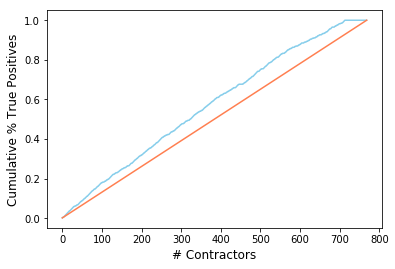

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df_test_result["%_Cumulative_True_Positive"].values.tolist(),color="skyblue")
plt.plot(df_test_result["%_Cumulative_Count"].values.tolist(),color="coral")
plt.xlabel('# Contractors',fontsize=12)
plt.ylabel('Cumulative % True Positives',fontsize=12)

# (8)  AUC-ROC Curve

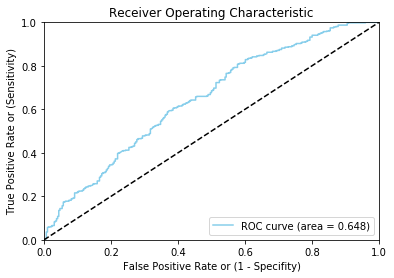

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(df_test_result["Actual"].values.tolist(), df_test_result["Predict_Positive_Prob"].values.tolist())
roc_auc = auc(fpr,tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc, color="skyblue")
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")